In [1]:
import apc
import pandas as pd

In [2]:
import warnings
warnings.simplefilter('ignore',FutureWarning)

In [3]:
data1=pd.read_excel('hello/APC_input3.xlsx',sheet_name='consshare3cohorts',index_col=0)
data1
#2+household consumption spending as % of average income

,1984,1989,1994,1999,2004,2009,2014
20,73.0,NaN,NaN,NaN,NaN,NaN,NaN
25,67.0,65.0,NaN,NaN,NaN,NaN,NaN
30,62.0,60.0,57.0,NaN,NaN,NaN,NaN
35,NaN,56.0,53.0,52.0,NaN,NaN,NaN
40,NaN,NaN,52.0,51.0,52.0,NaN,NaN
45,NaN,NaN,NaN,54.0,55.0,54.0,NaN
50,NaN,NaN,NaN,NaN,54.0,53.0,52.0
55,NaN,NaN,NaN,NaN,NaN,50.0,51.0
60,NaN,NaN,NaN,NaN,NaN,NaN,58.0


In [4]:
model=apc.Model()
model.data_from_df(response=data1, data_format='AP',time_adjust=1)
#consumption becomes response, data format is age-period

In [5]:
model.data_vector.tail()
#check for the vector tail

response
Period Age Cohort          
2009   50  1960        53.0
       55  1955        50.0
2014   50  1965        52.0
       55  1960        51.0
       60  1955        58.0

In [6]:
model._vector_to_array(model.data_vector['response'], space='AC').fillna('')
#align data for age-cohort layout

Cohort,1955,1960,1965
Age,,,
20,,,73
25,,67,65
30,62,60,57
35,56,53,52
40,52,51,52
45,54,55,54
50,54,53,52
55,50,51,
60,58,,


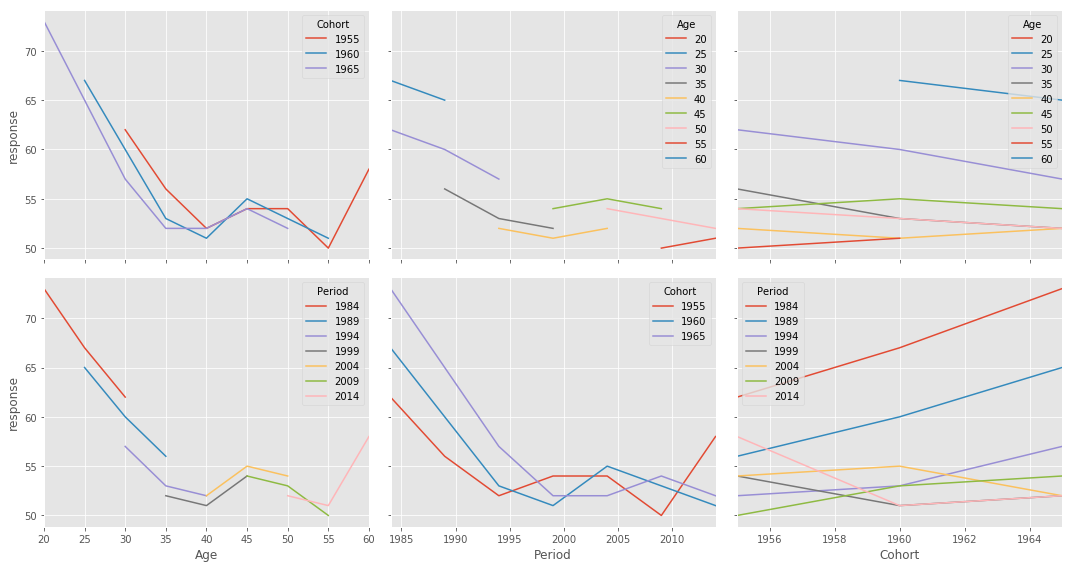

In [11]:
model.plot_data_within(figsize=(15,8),logy=False,n_groups=10)
#plot by Age, Perod, Cohort

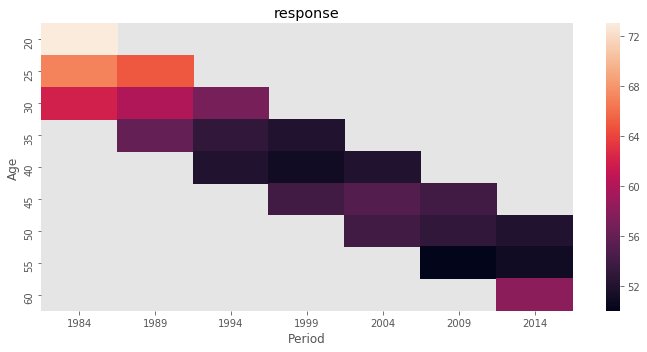

In [12]:
model.plot_data_heatmaps(figsize=(10,5))
#check the heatmap

In [13]:
model.fit_table('log_normal_response')
model.deviance_table.loc[['APC','AP','AC','PC']]
#Fit model and test variation attributable to age-period-cohort interactions.
#AC and PC show significant p and F values

,-2logL,df_resid,LR_vs_APC,df_vs_APC,F_vs_APC,P>F,aic
APC,-170.513,5,NaN,NaN,NaN,NaN,-138.513
AP,-168.168,6,2.34524,1,0.590764,0.476839,-138.168
AC,-117.183,10,53.33,5,11.6737,0.00870974,-95.1827
PC,-72.8738,12,97.6389,7,73.9499,9.56063e-05,-54.8738
